In [ ]:
import pandas as pd
nexd=pd.read_csv('/content/Tata_nexon_final.csv')

In [ ]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

def clean_stopwords_shortwords(w):
    stopwords_list=stopwords.words('english')
    words = w.split() 
    clean_words = [word for word in words if (word not in stopwords_list) and len(word) > 2]
    return " ".join(clean_words) 

#Combined function that will be called to preprocess our text data
def preprocess_sentence(w):
    #lowercase all the text
    w = w.lower()
    #Remove puntuations
    w = re.sub(r'[^\w\s]', '', w)
    w = re.sub(r"([?.!,¿])", r" ", w)
    w = re.sub(r'[" "]+', " ", w)
    w = re.sub(r"[^a-zA-Z?.!,¿]+", " ", w)
    #Calling stopword function
    w=clean_stopwords_shortwords(w)
    return w

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
nexd['Preprocessed_Review']=nexd['Review'].map(preprocess_sentence)

In [ ]:
def Range(sent):
  if 'range' in sent:ans = sent
  else:ans = None
  return ans

def Battery(sent):
  if 'battery' in sent:ans = sent
  else:ans = None
  return ans

def Power(sent):
  if 'power' in sent:ans = sent
  else:ans = None
  return ans

def Performance(sent):
  if 'performance' in sent:ans = sent
  else:ans = None
  return ans

def Comfort(sent):
  if 'comfort' in sent:ans = sent
  else:ans = None
  return ans

luggage = ['space', 'luggage', 'volume', 'bootspace', 'diggi']
def Space(sent):
  for i in luggage:
    if 'space' in sent:ans = sent
    else:ans = None
  return ans

def Storage(sent):
  if 'storage' in sent:ans = sent
  else:ans = None
  return ans

def Fcar(sent):
  if "first" in sent:ans = sent
  else:ans = None
  return ans

In [ ]:
nexd['range']=nexd['Preprocessed_Review'].map(Range)
nexd['battery']=nexd['Preprocessed_Review'].map(Battery)
nexd['power']=nexd['Preprocessed_Review'].map(Power)
nexd['performance']=nexd['Preprocessed_Review'].map(Performance)
nexd['comfort']=nexd['Preprocessed_Review'].map(Comfort)
nexd['space']=nexd['Preprocessed_Review'].map(Space)
nexd['storage']=nexd['Preprocessed_Review'].map(Storage)
nexd['FirstCar']=nexd['Preprocessed_Review'].map(Fcar)

In [ ]:
!pip install textblob
from textblob import TextBlob
def calculate_sentiment(review):
  text = TextBlob(review)
  return text.sentiment.polarity

def getAnalysis(score):
  if score < 0:
    return "Negative"
  elif score == 0:
    return "Neutral"
  else:
    return "Positive"

In [ ]:
nexd['Score']=nexd['Review'].map(calculate_sentiment)
nexd['Sentiment']=nexd['Score'].map(getAnalysis)

In [ ]:
Range_df = nexd[['range', 'Review', 'Score', 'Sentiment']]

In [ ]:
import numpy as np
Range_df = Range_df.replace(to_replace='None', value=np.nan).dropna()

In [ ]:
Range = nexd.Preprocessed_Review.str.split(expand=True).stack().value_counts().range
Battery = nexd.Preprocessed_Review.str.split(expand=True).stack().value_counts().battery
Power = nexd.Preprocessed_Review.str.split(expand=True).stack().value_counts().power
Performance = nexd.Preprocessed_Review.str.split(expand=True).stack().value_counts().performance
comfort = nexd.Preprocessed_Review.str.split(expand=True).stack().value_counts().comfort
space = nexd.Preprocessed_Review.str.split(expand=True).stack().value_counts().space
FirstCar = nexd.Preprocessed_Review.str.split(expand=True).stack().value_counts().first

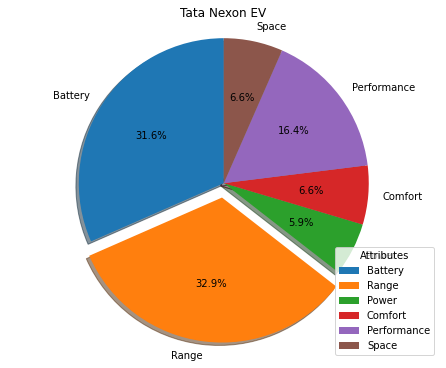

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
labels = ['Battery', 'Range', 'Power', 'Comfort', 'Performance', 'Space']
x = [Battery, Range, Power, comfort, Performance, space]

plt.pie(x, labels=labels, autopct='%1.1f%%', explode=[0,0.1,0,0,0,0], shadow=True, startangle=90)
plt.title('Tata Nexon EV')
plt.legend(title="Attributes", loc="lower right")
plt.axis('equal')
plt.subplots_adjust(left=0, bottom=0.1, right=1)
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

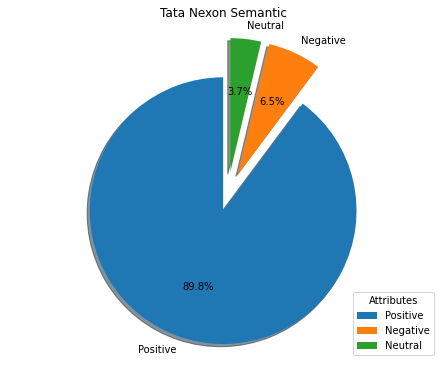

In [ ]:
Positive = nexd.Sentiment.str.split(expand=True).stack().value_counts().Positive
try:Negative = nexd.Sentiment.str.split(expand=True).stack().value_counts().Negative
except:Negative = 0
try:Neutral = nexd.Sentiment.str.split(expand=True).stack().value_counts().Neutral
except:Neutral = 0
labels = ['Positive', 'Negative', 'Neutral']
x = [Positive, Negative, Neutral]

plt.pie(x, labels=labels, autopct='%1.1f%%', explode=[0.1, 0.2, 0.2], shadow=True, startangle=90)
plt.title('Tata Nexon Semantic')
plt.legend(title="Attributes", loc="lower right")
plt.axis('equal')
plt.subplots_adjust(left=0, bottom=0.1, right=1)
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

Range

In [ ]:
Range_df.range.count()

38

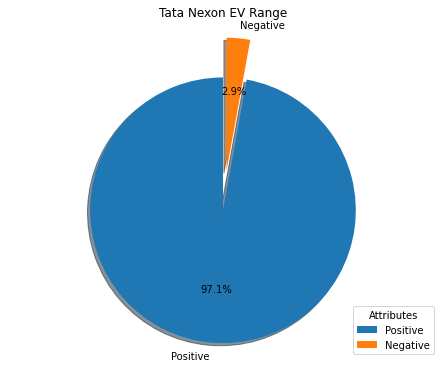

In [ ]:
Positive = Range_df.Sentiment.str.split(expand=True).stack().value_counts().Positive
Negative = Range_df.Sentiment.str.split(expand=True).stack().value_counts().Negative

labels = ['Positive', 'Negative']
x = [Positive, Negative]

plt.pie(x, labels=labels, autopct='%1.1f%%', explode=[0.1, 0.2, ], shadow=True, startangle=90)
plt.title('Tata Nexon EV Range')
plt.legend(title="Attributes", loc="lower right")
plt.axis('equal')
plt.subplots_adjust(left=0, bottom=0.1, right=1)
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


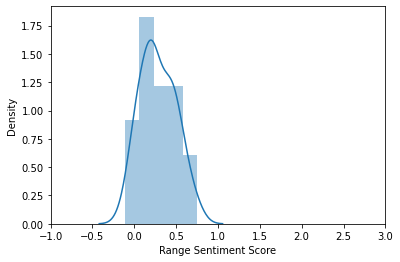

In [ ]:
sns.distplot(Range_df['Score'])
plt.xlim([-1, 3]);
plt.xlabel('Range Sentiment Score');

TOP 3 Range (Negative)

In [ ]:
Range_df=Range_df.sort_values(by = 'Score')
Range_df.head(3)


,range,Review,Score,Sentiment
89,one worst decision buy range limited cant oper...,One of my worst decision was to buy an EV. The...,-0.113841,Negative
213,tata power partnered set charging stations ran...,Tata Power is being partnered with to set up ...,0.000000,Neutral
201,obviously araicertified range conservative dri...,"Obviously, the 312km ARAI-certified range is i...",0.000000,Neutral


TOP3 Range(Positive)

In [ ]:
Range_df.tail(3)

,range,Review,Score,Sentiment
113,tata nexon one best affordable longrange elect...,Tata Nexon EV is one of the best affordable lo...,0.62,Positive
68,amazing option class wonderful experience vers...,It's an amazing option in this class Had a won...,0.65,Positive
24,best electronic car india price range obsolete...,The best electronic car in India in this price...,0.75,Positive


In [ ]:
Battery_df = nexd[['battery', 'Review', 'Score', 'Sentiment']]
Battery_df = Battery_df.replace(to_replace='None', value=np.nan).dropna()
Battery_df.battery.count()

33

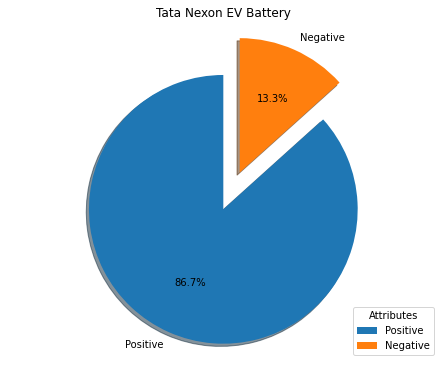

In [ ]:
Positive = Battery_df.Sentiment.str.split(expand=True).stack().value_counts().Positive
Negative = Battery_df.Sentiment.str.split(expand=True).stack().value_counts().Negative
labels = ['Positive', 'Negative']
x = [Positive, Negative]

plt.pie(x, labels=labels, autopct='%1.1f%%', explode=[0.1, 0.2], shadow=True, startangle=90)
plt.title('Tata Nexon EV Battery')
plt.legend(title="Attributes", loc="lower right")
plt.axis('equal')
plt.subplots_adjust(left=0, bottom=0.1, right=1)
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


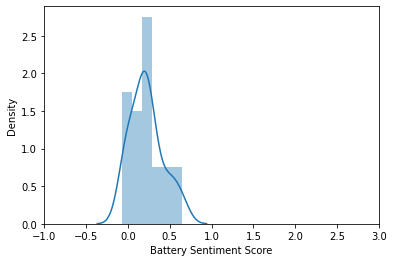

In [ ]:
sns.distplot(Battery_df['Score'])
plt.xlim([-1, 3]);
plt.xlabel('Battery Sentiment Score');

Top3 Battery (Negative)

In [ ]:
Battery_df=Battery_df.sort_values(by = 'Score')
Battery_df.head(3)

,battery,Review,Score,Sentiment
40,price high charging double price placing batte...,price high ..charging a double price for placi...,-0.076333,Negative
84,done service nexon lux drove months found time...,I have done my 2nd service of my Nexon EV LUX....,-0.035714,Negative
9,bought nexon next day onwards started issues b...,Bought Nexon EV on 28-5-21. Next day onwards I...,-0.024126,Negative


TOP 3 battery(Positive)


In [ ]:
Battery_df.tail(3)

,battery,Review,Score,Sentiment
49,car bit higher price fuel efficiency big plus ...,Car is bit higher on price but is fuel efficie...,0.541667,Positive
85,nice mileage better battery performance nice l...,"Nice mileage, better battery, performance, nic...",0.640000,Positive
6,nice car future electric best electric nexon d...,This nice car this future ka electric best in ...,0.650000,Positive


In [ ]:
Power_df = nexd[['power', 'Review', 'Score', 'Sentiment']]
Power_df = Power_df.replace(to_replace='None', value=np.nan).dropna()
Power_df.power.count()

14

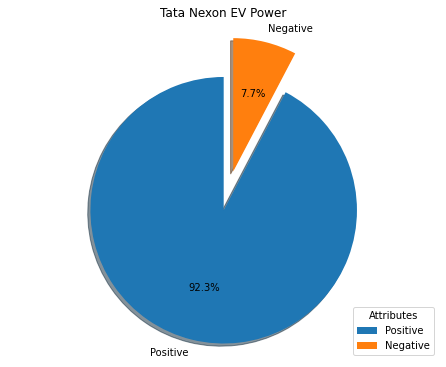

In [ ]:
Positive = Power_df.Sentiment.str.split(expand=True).stack().value_counts().Positive
Negative = Power_df.Sentiment.str.split(expand=True).stack().value_counts().Negative
labels = ['Positive', 'Negative']
x = [Positive, Negative]

plt.pie(x, labels=labels, autopct='%1.1f%%', explode=[0.1, 0.2], shadow=True, startangle=90)
plt.title('Tata Nexon EV Power')
plt.legend(title="Attributes", loc="lower right")
plt.axis('equal')
plt.subplots_adjust(left=0, bottom=0.1, right=1)
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


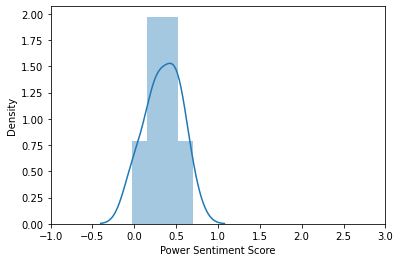

In [ ]:
sns.distplot(Power_df['Score'])
plt.xlim([-1, 3]);
plt.xlabel('Power Sentiment Score');

top 3 Power (Negative)

In [ ]:
Power_df=Power_df.sort_values(by = 'Score')
Power_df.head(3)

,power,Review,Score,Sentiment
9,bought nexon next day onwards started issues b...,Bought Nexon EV on 28-5-21. Next day onwards I...,-0.024126,Negative
213,tata power partnered set charging stations ran...,Tata Power is being partnered with to set up ...,0.000000,Neutral
128,wonderful car drive however faced problems cou...,"It is a wonderful car to drive. However, I fac...",0.161905,Positive


Top 3 Power(Positive) 

In [ ]:
Power_df.tail(3)

,power,Review,Score,Sentiment
53,tata nexon car amazing featuresand affordable ...,"Tata Nexon ev car has amazing features,and thi...",0.516327,Positive
108,good jarvis efficient segment india tata nexon...,Very good Jarvis. The most efficient in this s...,0.552500,Positive
58,superd car everything good powerful engine des...,"Superd car each and everything so good, it's h...",0.700000,Positive


Performance

In [ ]:
Performance_df = nexd[['performance', 'Review', 'Score', 'Sentiment']]
Performance_df = Performance_df.replace(to_replace='None', value=np.nan).dropna()
Performance_df.performance.count()

28

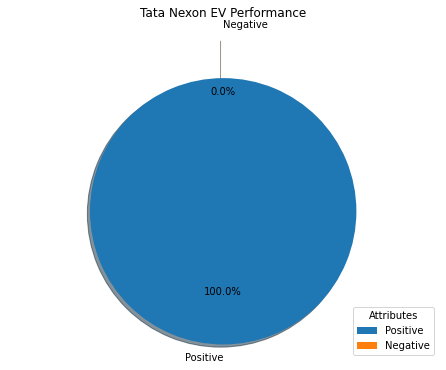

In [ ]:
Positive = Performance_df.Sentiment.str.split(expand=True).stack().value_counts().Positive
Negative = 0
labels = ['Positive', 'Negative']
x = [Positive, Negative]

plt.pie(x, labels=labels, autopct='%1.1f%%', explode=[0.1, 0.2], shadow=True, startangle=90)
plt.title('Tata Nexon EV Performance')
plt.legend(title="Attributes", loc="lower right")
plt.axis('equal')
plt.subplots_adjust(left=0, bottom=0.1, right=1)
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


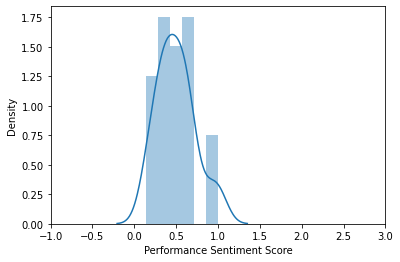

In [ ]:
sns.distplot(Performance_df['Score'])
plt.xlim([-1, 3]);
plt.xlabel('Performance Sentiment Score');

In [ ]:
Performance_df=Performance_df.sort_values(by = 'Score')
Performance_df.head(3)

,performance,Review,Score,Sentiment
57,basically get solid built quality tata usual f...,Basically you will get solid built quality by ...,0.145000,Positive
67,car good driving performance price high compar...,This car is good by driving performance but th...,0.168333,Positive
16,bought nexon months ago always interested elec...,I bought Nexon EV 2 months ago. I was always i...,0.203876,Positive


In [ ]:
Performance_df.tail(3)

,performance,Review,Score,Sentiment
107,nice car looks awesome performance wonderful i...,Very nice car it looks very awesome and its pe...,0.89,Positive
21,best car would say best safety performancethis...,"Best car i would say, Best in safety, performa...",1.00,Positive
154,tata best company world tata nexon electric ve...,Tata is the best company in the world Tata Nex...,1.00,Positive


Comfort

In [ ]:
comfort_df = nexd[['comfort', 'Review', 'Score', 'Sentiment']]
comfort_df = comfort_df.replace(to_replace='None', value=np.nan).dropna()
comfort_df.comfort.count()

23

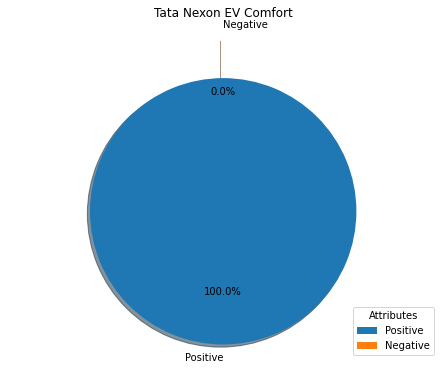

In [ ]:
Positive = comfort_df.Sentiment.str.split(expand=True).stack().value_counts().Positive
Neutral =0
labels = ['Positive', 'Negative']
x = [Positive, Negative]

plt.pie(x, labels=labels, autopct='%1.1f%%', explode=[0.1, 0.2], shadow=True, startangle=90)
plt.title('Tata Nexon EV Comfort')
plt.legend(title="Attributes", loc="lower right")
plt.axis('equal')
plt.subplots_adjust(left=0, bottom=0.1, right=1)
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()




/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


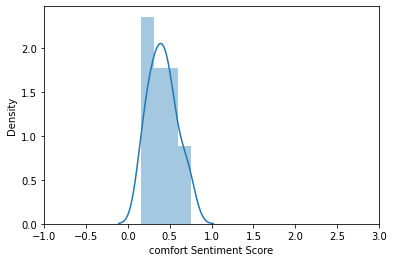

In [ ]:
sns.distplot(comfort_df['Score'])
plt.xlim([-1, 3]);
plt.xlabel('comfort Sentiment Score');

In [ ]:
comfort_df=comfort_df.sort_values(by = 'Score')
comfort_df.head(3)

,comfort,Review,Score,Sentiment
26,ride comfortable interiors premium max single ...,"Ride is very comfortable, interiors are very p...",0.158571,Positive
88,vehicle good battery suddenly dropping dangers...,"EV vehicle is good, but battery suddenly dropp...",0.180000,Positive
125,seen lots reviews regarding nexon range kolkat...,I have seen lots of reviews regarding the Nexo...,0.194643,Positive


In [ ]:
comfort_df.tail(3)

,comfort,Review,Score,Sentiment
2,really amazing experiencejust loved carso beau...,Really very Amazing experience.Just loved that...,0.6825,Positive
4,good car good safety comfort options,Good car with good safety and comfort with all...,0.7000,Positive
144,like cars safety comfort design impressive pre...,I like this car's safety and comfort and the d...,0.7500,Positive


SPACE

In [ ]:
space_df = nexd[['space', 'Review', 'Score', 'Sentiment']]
space_df = space_df.replace(to_replace='None', value=np.nan).dropna()
space_df.space.count()

9

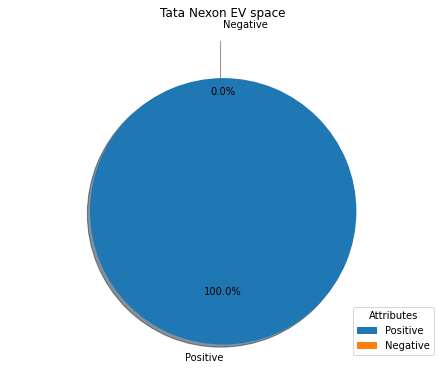

In [ ]:
Positive = space_df.Sentiment.str.split(expand=True).stack().value_counts().Positive
Neutral =0
labels = ['Positive', 'Negative']
x = [Positive, Negative]

plt.pie(x, labels=labels, autopct='%1.1f%%', explode=[0.1, 0.2], shadow=True, startangle=90)
plt.title('Tata Nexon EV space')
plt.legend(title="Attributes", loc="lower right")
plt.axis('equal')
plt.subplots_adjust(left=0, bottom=0.1, right=1)
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


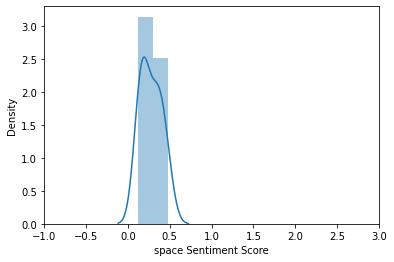

In [ ]:
sns.distplot(space_df['Score'])
plt.xlim([-1, 3]);
plt.xlabel('space Sentiment Score');

In [ ]:
space_df.tail(3)

,space,Review,Score,Sentiment
8,love car comfortable pocket friendly even bad ...,"Love this car, very comfortable and pocket fri...",0.364091,Positive
98,good car sunroof art car generation india like...,It is a very good car with a sunroof on it. Ar...,0.403333,Positive
18,recently purchased car driver comfort providin...,"Recently purchased this car, driver comfort, p...",0.479167,Positive
